Задача 4
Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9
с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2.
По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса.



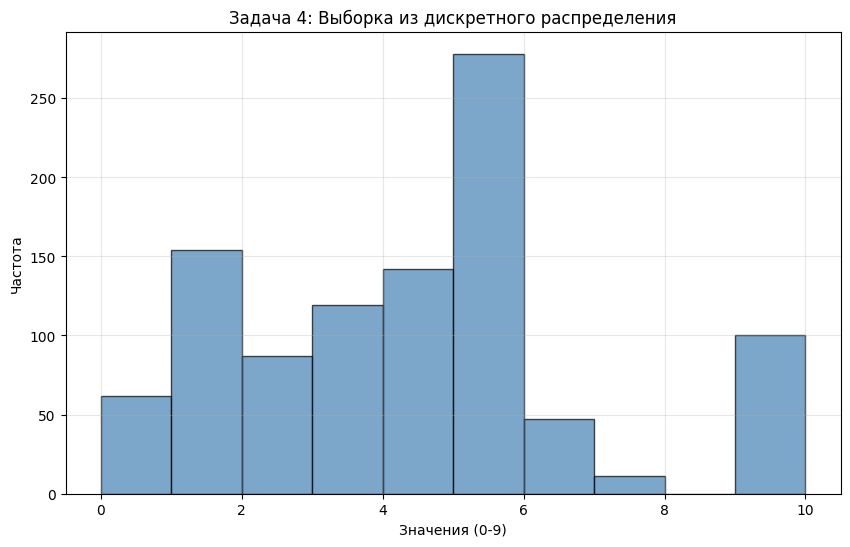

Весa: [0.06  0.149 0.083 0.119 0.154 0.269 0.055 0.01  0.    0.1  ]
Отсортированные веса: [0.269 0.154 0.149 0.119 0.1   0.083 0.06  0.055 0.01  0.   ]


In [1]:


import numpy as np
import matplotlib.pyplot as plt

weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
weights = weights / np.sum(weights)

# Оптимизированный алгоритм с сортировкой весов
sorted_indices = np.argsort(weights)[::-1]
sorted_weights = weights[sorted_indices]
cumulative = np.cumsum(sorted_weights)

# Генерация выборки
n_samples = 1000
samples = np.zeros(n_samples)
random_values = np.random.rand(n_samples)

for i in range(n_samples):
    r = random_values[i]
    idx = np.searchsorted(cumulative, r)
    samples[i] = sorted_indices[idx]

# Гистограмма
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=np.arange(11), edgecolor='black', alpha=0.7, color='steelblue')
plt.xlabel("Значения (0-9)")
plt.ylabel("Частота")
plt.title("Задача 4: Выборка из дискретного распределения")
plt.grid(alpha=0.3)
plt.show()

print(f"Весa: {np.round(weights, 3)}")
print(f"Отсортированные веса: {np.round(sorted_weights, 3)}")

Задача 6
Обоснуйте (устно), что метод accept-reject действительно производит выборку из нужного распределения.
Смоделируйте 1000 точек из распределения с плотностью e^x·cos²x на отрезке [-π/2, π/2].
По выборке постройте график выборочной гистограммы и сравните его с графиком точной функции плотности.

/tmp/ipython-input-2080254406.py:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Z = np.trapz(target_density(x_grid), x_grid)


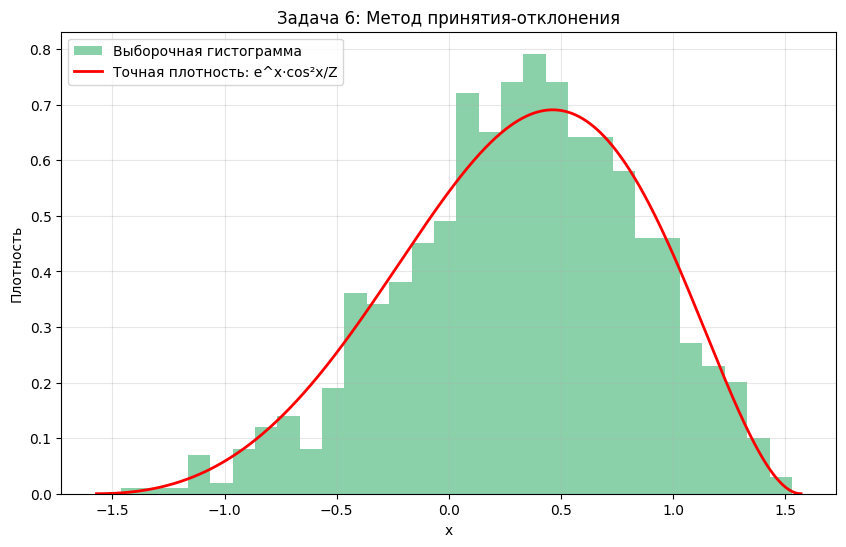

Нормировочная константа Z = 1.8410
Эффективность метода: 46.32%


In [2]:

def target_density(x):
    return np.exp(x) * np.cos(x)**2

# Нормировочная константа
x_grid = np.linspace(-np.pi/2, np.pi/2, 1000)
Z = np.trapz(target_density(x_grid), x_grid)

# Параметры метода accept-reject
M = np.max(target_density(x_grid)) / Z
n_target = 1000
samples_ar = []
attempts = 0

while len(samples_ar) < n_target:
    attempts += 1
    x_candidate = np.random.uniform(-np.pi/2, np.pi/2)
    y = np.random.uniform(0, M)

    if y <= target_density(x_candidate) / Z:
        samples_ar.append(x_candidate)

samples_ar = np.array(samples_ar)

# Гистограмма и сравнение
plt.figure(figsize=(10, 6))
plt.hist(samples_ar, bins=30, density=True, alpha=0.6, color='mediumseagreen', label='Выборочная гистограмма')
plt.plot(x_grid, target_density(x_grid)/Z, 'r-', linewidth=2, label='Точная плотность: e^x·cos²x/Z')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.title('Задача 6: Метод принятия-отклонения')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"Нормировочная константа Z = {Z:.4f}")
print(f"Эффективность метода: {n_target/attempts:.2%}")

Задача 7
Смоделировать и изобразить выборку из 500 точек равномерно распределенных внутри данного треугольника
без использования метода отбора.
Треугольник с вершинами: (1, 2), (2, 6), (8, 1)

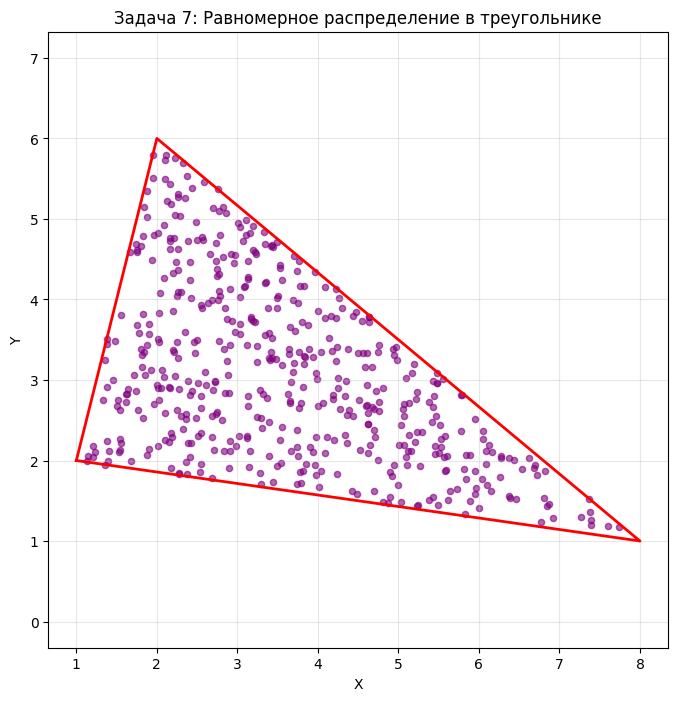

Вершины треугольника: A[1 2], B[2 6], C[8 1]


In [3]:
vertices = np.array([[1, 2], [2, 6], [8, 1]])
n_points = 500

# Равномерное распределение в треугольнике
u = np.random.rand(n_points, 2)
mask = u[:, 0] + u[:, 1] > 1
u[mask] = 1 - u[mask]

points = vertices[0] + u[:, 0:1] * (vertices[1] - vertices[0]) + u[:, 1:2] * (vertices[2] - vertices[0])

# Визуализация
plt.figure(figsize=(8, 8))
plt.scatter(points[:, 0], points[:, 1], alpha=0.6, s=20, color='purple')
plt.plot([vertices[0, 0], vertices[1, 0], vertices[2, 0], vertices[0, 0]],
         [vertices[0, 1], vertices[1, 1], vertices[2, 1], vertices[0, 1]],
         'r-', linewidth=2)
plt.title('Задача 7: Равномерное распределение в треугольнике')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(alpha=0.3)
plt.axis('equal')
plt.show()

print(f"Вершины треугольника: A{vertices[0]}, B{vertices[1]}, C{vertices[2]}")

Задача 8
Смоделировать без использования метода отбора выборку из 500 точек равномерно распределенных
внутри единичного круга. Изобразите полученные точки. Они действительно равномерно заполняют круг?

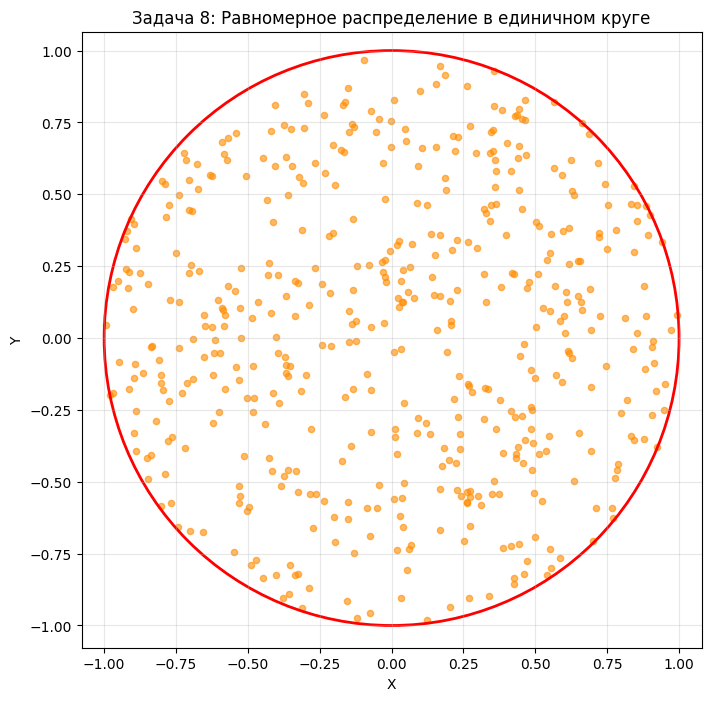

Плотность точек по радиусу пропорциональна r
Радиусы: min=0.050, max=0.998, mean=0.662


In [4]:

n_points = 500

# Метод полярных координат для равномерного распределения в круге
r = np.sqrt(np.random.rand(n_points))
theta = 2 * np.pi * np.random.rand(n_points)
x_circle = r * np.cos(theta)
y_circle = r * np.sin(theta)

# Визуализация
plt.figure(figsize=(8, 8))
plt.scatter(x_circle, y_circle, alpha=0.6, s=20, color='darkorange')
circle = plt.Circle((0, 0), 1, color='r', fill=False, linewidth=2)
plt.gca().add_artist(circle)
plt.title('Задача 8: Равномерное распределение в единичном круге')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(alpha=0.3)
plt.axis('equal')
plt.show()

# Проверка равномерности
radial_density = np.histogram(r, bins=10)[0]
print(f"Плотность точек по радиусу пропорциональна r")
print(f"Радиусы: min={r.min():.3f}, max={r.max():.3f}, mean={r.mean():.3f}")

Задача 9
Докажите (устно), что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из
независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических
функций np.sin и np.cos.

С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского
распределения со средним [4, 7] и ковариационной матрицей:
[[20, -4],
 [-4, 40]]

Постройте 2D гистограмму полученного распределения. Сравните выборочное среднее и ковариационную
матрицу с точными значениями.

Генерация стандартных нормальных величин...


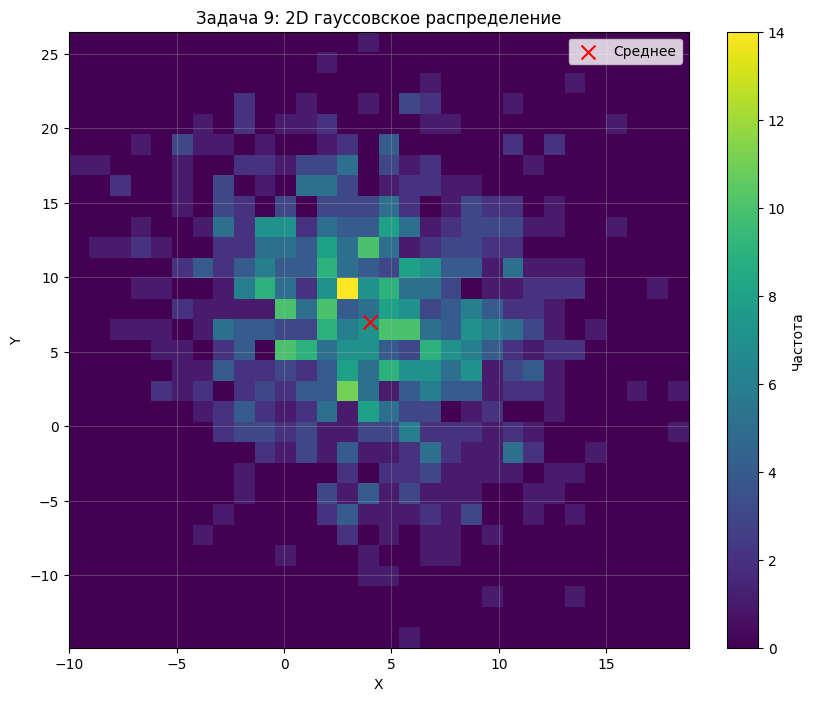

СТАТИСТИЧЕСКОЕ СРАВНЕНИЕ

1. Параметры распределения:
   Среднее: μ = [4 7]
   Ковариация:
[[20 -4]
 [-4 40]]

2. Выборочные оценки:
   Выборочное среднее: [3.936 7.199]
   Выборочная ковариация:
[[20.16  -4.937]
 [-4.937 40.272]]

3. Отклонения:
   Ошибка среднего: 0.2094
   Ошибка ковариации (норма Фробениуса): 1.3620

4. Проверка свойств N(0,1):
   Среднее z1: -0.014402 (ожидается 0)
   Среднее z2: 0.029774 (ожидается 0)
   Дисперсия z1: 1.006969 (ожидается 1)
   Дисперсия z2: 0.996543 (ожидается 1)
   Корреляция z1,z2: -0.032232 (ожидается 0)


In [7]:


n_samples = 1000

# Модифицированный метод Box-Muller (Marsaglia polar method)
def marsaglia_polar(n):
    z1 = np.zeros(n)
    z2 = np.zeros(n)
    generated = 0

    while generated < n:
        u1, u2 = np.random.uniform(-1, 1, 2)
        s = u1**2 + u2**2

        if s < 1 and s > 0:  # Точка внутри единичного круга
            factor = np.sqrt(-2 * np.log(s) / s)
            z1[generated] = u1 * factor
            z2[generated] = u2 * factor
            generated += 1

    return z1, z2

# Генерация стандартных нормальных величин
print("Генерация стандартных нормальных величин...")
z1, z2 = marsaglia_polar(n_samples)

# Преобразование к целевому распределению
mean = np.array([4, 7])
cov = np.array([[20, -4],
                [-4, 40]])

# Разложение Холецкого ковариационной матрицы
L = np.linalg.cholesky(cov)

# Преобразование: X = μ + L·Z
Z = np.vstack([z1, z2])
X = mean[:, np.newaxis] + L @ Z

x_final, y_final = X[0], X[1]

# 2D гистограмма
plt.figure(figsize=(10, 8))
plt.hist2d(x_final, y_final, bins=30, cmap='viridis')
plt.colorbar(label='Частота')
plt.scatter(mean[0], mean[1], color='red', s=100, marker='x', label='Среднее')
plt.title('Задача 9: 2D гауссовское распределение')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Сравнение параметров
sample_mean = np.array([np.mean(x_final), np.mean(y_final)])
sample_cov = np.cov(X)

print("=" * 50)
print("СТАТИСТИЧЕСКОЕ СРАВНЕНИЕ")
print("=" * 50)
print("\n1. Параметры распределения:")
print(f"   Среднее: μ = {mean}")
print(f"   Ковариация:\n{cov}")

print("\n2. Выборочные оценки:")
print(f"   Выборочное среднее: {np.round(sample_mean, 3)}")
print(f"   Выборочная ковариация:\n{np.round(sample_cov, 3)}")

print("\n3. Отклонения:")
mean_error = np.linalg.norm(mean - sample_mean)
print(f"   Ошибка среднего: {mean_error:.4f}")
print(f"   Ошибка ковариации (норма Фробениуса): {np.linalg.norm(cov - sample_cov):.4f}")

print("\n4. Проверка свойств N(0,1):")
print(f"   Среднее z1: {np.mean(z1):.6f} (ожидается 0)")
print(f"   Среднее z2: {np.mean(z2):.6f} (ожидается 0)")
print(f"   Дисперсия z1: {np.var(z1):.6f} (ожидается 1)")
print(f"   Дисперсия z2: {np.var(z2):.6f} (ожидается 1)")
print(f"   Корреляция z1,z2: {np.corrcoef(z1, z2)[0,1]:.6f} (ожидается 0)")


